##### Imports 

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data ---twitter csv
tweets_df = pd.read_csv('twitter.csv')
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
tweets_df.drop(['id'],axis=1,inplace=True)
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


##### Data exploration
***

In [6]:
#no missing values
tweets_df.isnull().sum()

label    0
tweet    0
dtype: int64

<AxesSubplot:>

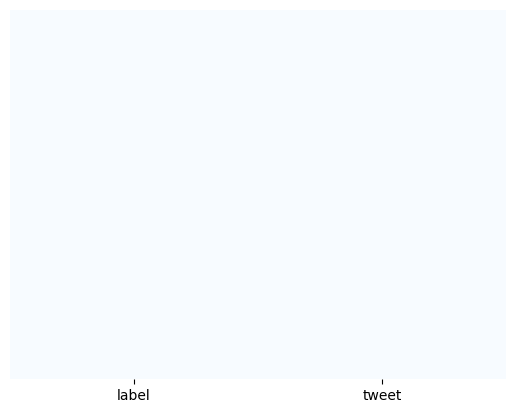

In [7]:
sns.heatmap(tweets_df.isnull(), yticklabels=False,cbar = False,cmap='Blues')

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

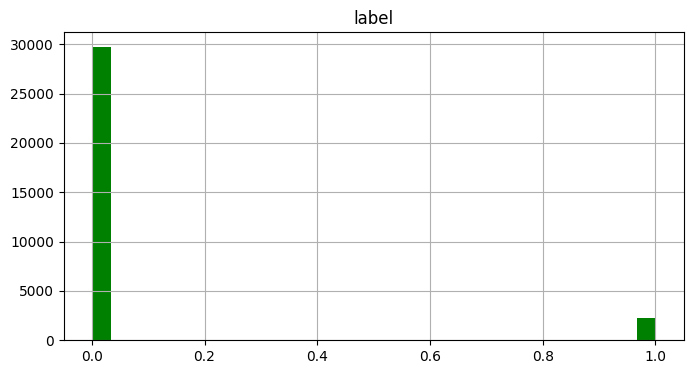

In [8]:
#plot the labels
tweets_df.hist(bins = 30,figsize=(8,4),color = 'green')
#a lot more 0 values than 1 --->unbalanced data

<AxesSubplot:ylabel='count'>

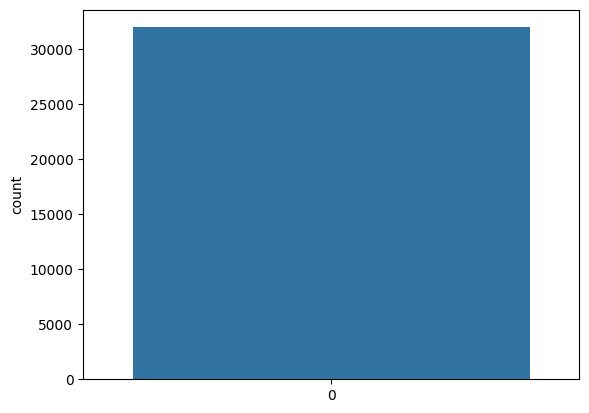

In [9]:
sns.countplot(tweets_df['label'],label = 'Count')

In [10]:
#extra features 
# how many characters per tweet
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [11]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [12]:
min(tweets_df['length'])

11

In [13]:
#view shortest and longest message
print('Shortest tweet is:',tweets_df.loc[tweets_df['length'] == min(tweets_df['length'])]['tweet'].values[0])
print('Longest tweet is:',tweets_df.loc[tweets_df['length'] == max(tweets_df['length'])]['tweet'].values[0])


Shortest tweet is: i love you 
Longest tweet is:  @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ðððððððððððð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð±ð±ð¤ð¤ð±ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ðððððððâ¦


In [14]:
#view the tweet with average length
tweets_df['length'].mean()
#but length isn't float so 

84.73962830861649

In [15]:
tweets_df[tweets_df['length'] == 85]

,label,tweet,length
115,0,â #under the spell of brexit referendum - c...,85
242,0,make today count! #mondaymotivation #livelifet...,85
384,0,"dream palace, can we move in already? #stellar...",85
573,0,@user monkeys are also declared as vermin. no ...,85
634,0,save thousands $$ free search x logins x broke...,85
...,...,...,...
31393,0,#flagday2016 #flag #day #2016 #(30 #photos) ...,85
31468,0,jts88troxy theater jts88@user ð #love #si...,85
31542,0,stretched to the limit and still #waiting pati...,85
31773,0,this reminds me of this. i am love these two...,85


##### WordCloud
***

In [16]:
#create two dataframes 
#with all the positive and all the negative tweets
positive_tweets = tweets_df[tweets_df['label']==0]
positive_tweets

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [17]:
negative_tweets = tweets_df[tweets_df['label']==1]
negative_tweets

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [18]:
#combine all the tweets into a massive string 
#use a wordcloud
#convert them to a list 
sentences = tweets_df['tweet'].to_list()
len(sentences)
sentences[0:3]

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty']

In [19]:
#join them all together
joined_sentences = " ".join(sentences)

In [20]:
joined_sentences[0:3]

' @u'

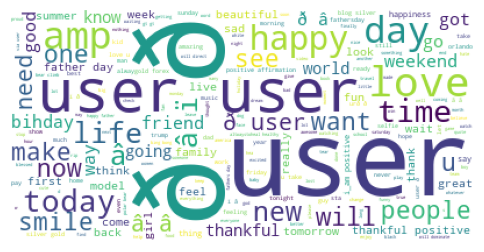

In [28]:
#import the libraries for wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
plt.figure(figsize=(6,6))
wordcloud = WordCloud(background_color='white').generate(joined_sentences)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [33]:
#plot the wordcloud only for the negative dataframe 
negative_sentences = " ".join(x for x in negative_tweets['tweet'])

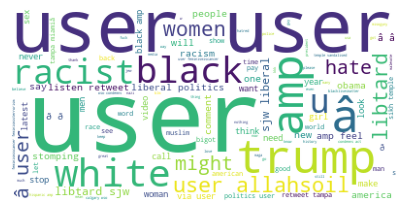

In [37]:
wordcloud_neg = WordCloud(background_color='white').generate(negative_sentences)
plt.figure(figsize=(5,5))
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.show()

##### Data cleaning 
***

In [38]:
#remove punctuations, stopwords etc.
#stopwords: common words like a,I,the
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
#testing how it works
test_text = '$I love AI & Machine Learning !!'


In [41]:
test_pun_removed = [x for x in test_text if x not in string.punctuation]
test_pun_removed
#rejoin them 
test_pun_removed_join = " ".join(test_pun_removed)
test_pun_removed_join

'I   l o v e   A I     M a c h i n e   L e a r n i n g  '